In [1]:
import os
import classicdb.fetch as fetch
from nltk.corpus import CategorizedPlaintextCorpusReader

url = fetch.URL
data_home = fetch.get_data_home()
classic_home = os.path.join(data_home, fetch.CLASSIC_HOME)
print("download and extracting file from " + url)
fetch.download_and_unzip(url, classic_home, fetch.ARCHIVE_NAME)
print("downloaded and extracted to " + classic_home)

corpus_root = os.path.join(classic_home, fetch.TRAIN_FOLDER)
corpus_reader = CategorizedPlaintextCorpusReader(corpus_root, r'.*', cat_pattern=r'(\w+)/*')
print("database was loaded into memory")

cats = corpus_reader.categories()
print("database categories: " + str(cats))

download and extracting file from https://sites.google.com/site/xchgdir/public/classic.tar.gz?attredirects=0&d=1


downloaded and extracted to C:\Users\lmamani\scikit_learn_data\classic_home
database was loaded into memory
database categories: ['cacm', 'cisi', 'cran', 'med']


done in 1.322132s
m samples: 7095, n features: 24542



In [22]:
n = 10
labels = [cat for cat in corpus_reader.categories() for fileid in corpus_reader.fileids(cat)[0:n]]
fileids = [fileid for cat in corpus_reader.categories() for fileid in corpus_reader.fileids(cat)[0:n]]
files = [corpus_reader.raw(fileid) for cat in corpus_reader.categories() for fileid in corpus_reader.fileids(cat)[0:n]]
print(n, " files by category loaded!")

10  files by category loaded!


In [23]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer

start = time()
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(files)
print("done in %fs" % (time() - start))
print("m samples: %d, n features: %d" % X.shape)
print()

done in 0.007000s
m samples: 40, n features: 1117



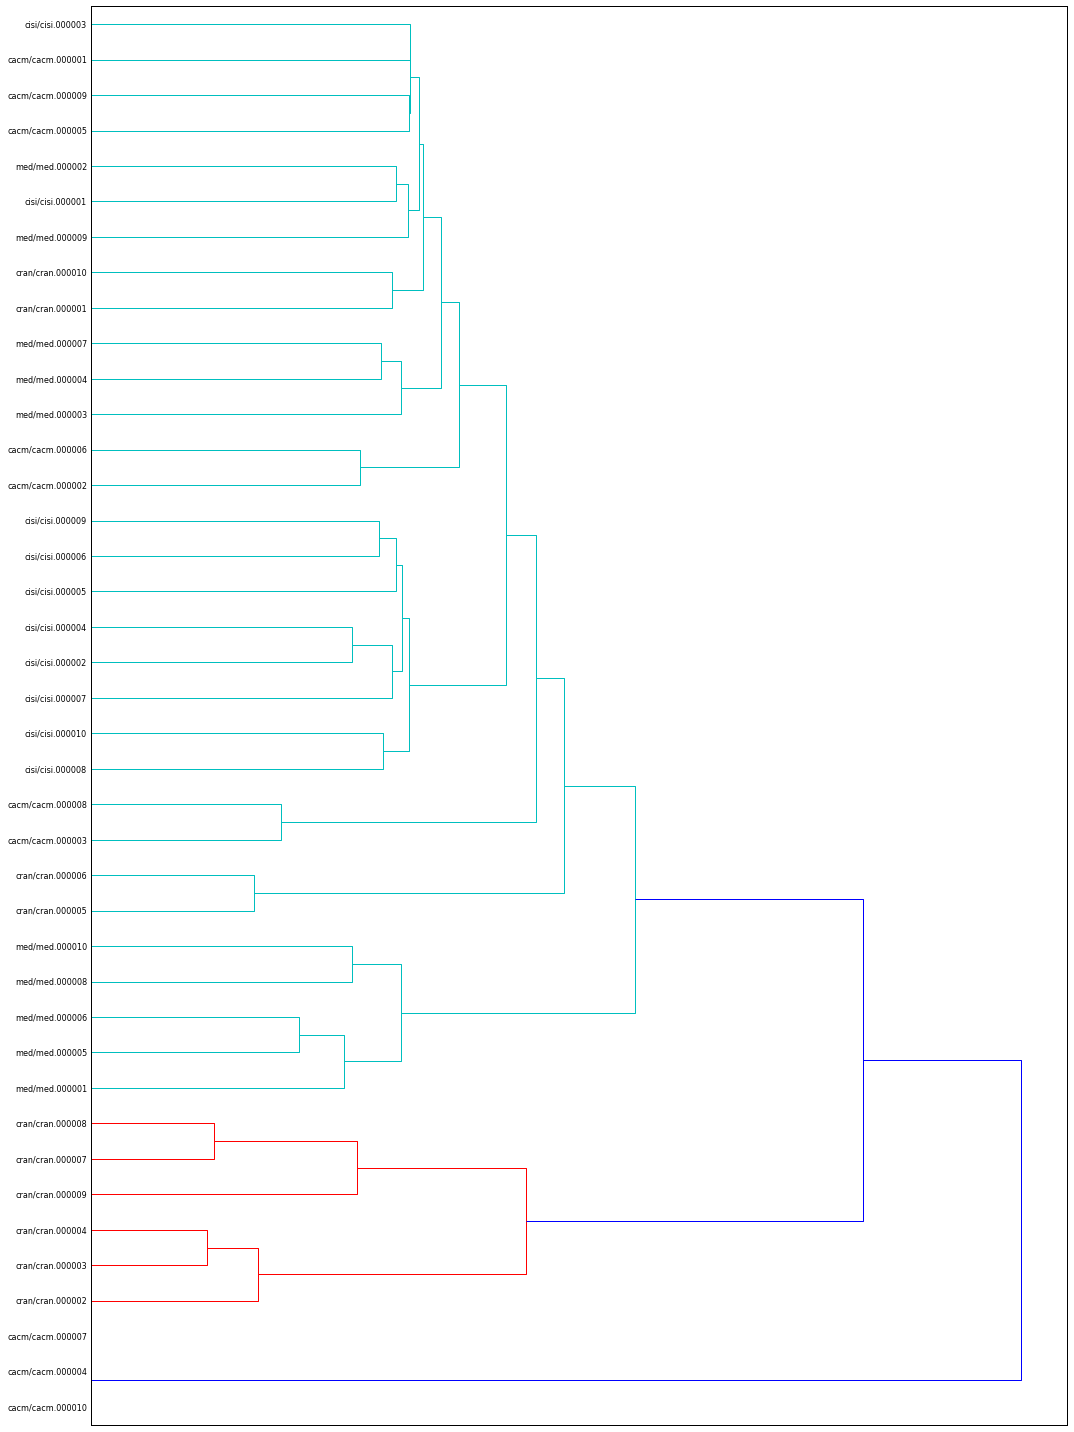

In [24]:
% matplotlib inline

from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram

dist = 1 - cosine_similarity(X)
linkage_matrix = ward(dist)  #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20))  # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=fileids)
# ax = dendrogram(linkage_matrix, orientation="right");

plt.tick_params(
    axis='x',  # changes apply to the x-axis
    which='both',  # both major and minor ticks are affected
    bottom='off',  # ticks along the bottom edge are off
    top='off',  # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout()  #show plot with tight layout

#uncomment below to save figure
# plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

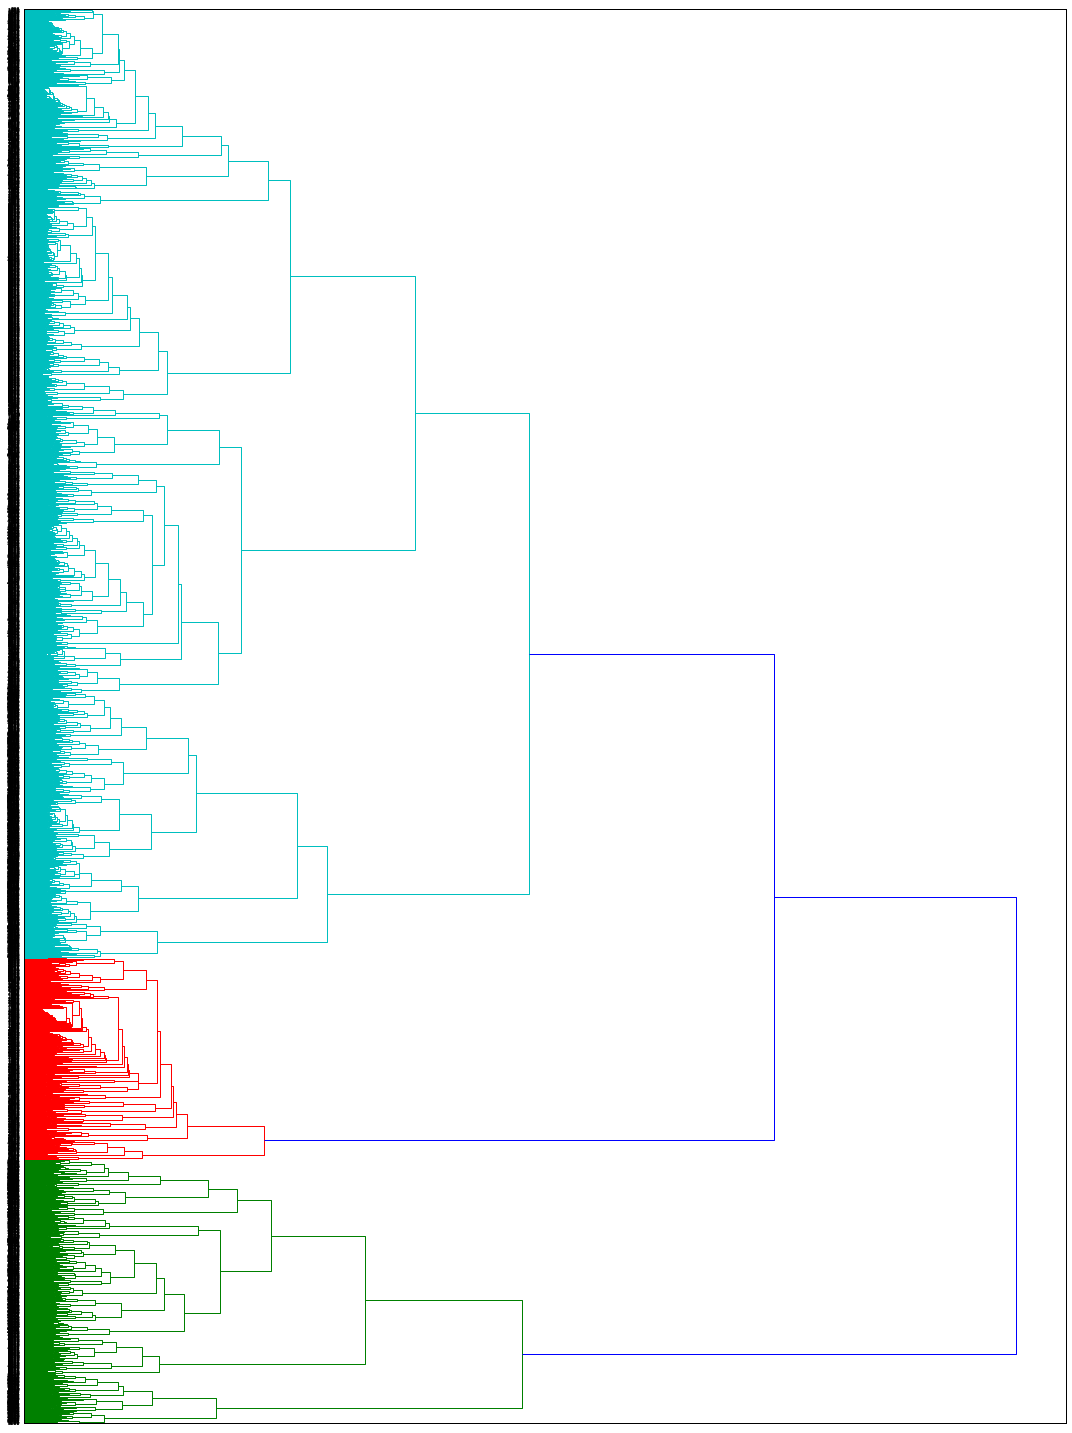

In [3]:
% matplotlib inline

from matplotlib import pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(X)

from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
# ax = dendrogram(linkage_matrix, orientation="right", labels=titles);
ax = dendrogram(linkage_matrix, orientation="right");

plt.tick_params(
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
# plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters